# Leitura e Limpeza de Dados
Este notebook lê três fontes de dados:
- Arquivos `.txt` de uma pasta
- Um arquivo `.csv`
- Um arquivo `.xlsx`

Extrai informações do xlsx e salva num csv.

Os .txt não tem link válido

In [1]:
import pandas as pd
import os

# Defina os caminhos abaixo
pasta_txt = '../data/db_reduced/fake-meta-information'
arquivo_csv = '../data/central_de_fatos.csv'
arquivo_atualizado_desinfopedia = '../data/desinfopedia_final_completo.csv'

In [2]:
# Leitura dos arquivos .txt
lista_txts = []

for nome_arquivo in os.listdir(pasta_txt):
    if nome_arquivo.endswith('.txt'):
        caminho = os.path.join(pasta_txt, nome_arquivo)
        with open(caminho, 'r', encoding='utf-8') as f:
            conteudo = f.read()
            lista_txts.append({'arquivo': nome_arquivo, 'conteudo': conteudo})

df_txt = pd.DataFrame(lista_txts)
#df_txt = df_txt.drop_duplicates()
#print("Arquivos TXT sem duplicatas:")
#df_txt.head()

In [3]:
# Leitura do arquivo CSV
df_csv = pd.read_csv(arquivo_csv, sep=';', encoding='utf-8')
#df_csv = df_csv.drop_duplicates()
#print("\nArquivo CSV sem duplicatas:")
df_csv.head()

,url,source_name,title,subtitle,publication_date,text_news,image_link,video_link,authors,categories,tags,obtained_at,rating
0,https://projetocomprova.com.br/publica%C3%A7%C...,COMPROVA,Publicações enganam ao associar Bolsonaro à ap...,NaN,2020-07-31,Ancine aprovou em 2019 a captação de 530 mil r...,NaN,NaN,['Projeto Comprova'],['Políticas públicas'],[],2021-07-06,['Enganoso']
1,https://projetocomprova.com.br/publica%C3%A7%C...,COMPROVA,Post mostra imagens de outras estradas para af...,NaN,2020-07-31,Parte dos trechos das gravações utilizadas no ...,https://i2.wp.com/projetocomprova.com.br/wp-co...,NaN,['Projeto Comprova'],['Políticas públicas'],[],2021-07-06,['Falso']
2,https://projetocomprova.com.br/publica%C3%A7%C...,COMPROVA,Eduardo Bolsonaro posta vídeo antigo sobre lib...,NaN,2020-07-31,"Em uma publicação no Twitter, o deputado usa c...",NaN,NaN,['Projeto Comprova'],['Pandemia'],[],2021-07-06,['Enganoso']
3,https://projetocomprova.com.br/publica%C3%A7%C...,COMPROVA,Médica cita estudos não conclusivos para suger...,NaN,2020-07-30,"Procurada pelo Comprova, médica enviou 34 estu...",NaN,NaN,['Projeto Comprova'],['Pandemia'],[],2021-07-06,['Enganoso']
4,https://projetocomprova.com.br/publica%C3%A7%C...,COMPROVA,Médica usa informações falsas em vídeo para fa...,NaN,2020-07-29,Ao contrário do que afirma uma médica em vídeo...,NaN,NaN,['Projeto Comprova'],['Pandemia'],[],2021-07-06,['Falso']


In [4]:
# Leitura do arquivo Excel
df_xlsx = pd.read_csv(arquivo_atualizado_desinfopedia, sep=';', encoding='utf-8')

#df_xlsx = df_xlsx.drop_duplicates()
#print("\nArquivo XLSX sem duplicatas:")
df_xlsx.head()

,title,url,source_name,publication_date,subtitle,text_news,image_link,video_link,authors,categories,tags,obtained_at,rating
0,Maiara e Maraisa não gritaram ‘fora Bolsonaro’...,https://www.aosfatos.org/noticias/maiara-e-mar...,Aos Fatos,2022-09-16,NaN,É falso que Maiara e Maraisa abandonaram um sh...,NaN,NaN,NaN,NaN,NaN,NaN,Falso
1,"Lula, Bolsonaro, Ciro e Tebet erram ao falar d...",https://www.aosfatos.org/noticias/lula-bolsona...,Aos Fatos,2022-09-16,NaN,A violência contra a mulher caiu drasticamente...,NaN,NaN,NaN,NaN,NaN,NaN,Falso
2,Vídeo que mostra Lula se entregando à PF em 20...,https://www.aosfatos.org/noticias/video-mostra...,Aos Fatos,2022-09-14,NaN,Um vídeo que mostra o ex-presidente Luiz Ináci...,NaN,NaN,NaN,NaN,NaN,NaN,Falso
3,Anúncio de Thronicke engana ao dizer que uso d...,https://www.aosfatos.org/noticias/anuncio-de-t...,Aos Fatos,2022-09-14,NaN,Não é verdade que o uso de emendas do chamado ...,NaN,NaN,NaN,NaN,NaN,NaN,Falso
4,Luís Roberto Barroso não é sogro de dono da Re...,https://www.aosfatos.org/noticias/barroso-stf-...,Aos Fatos,2022-09-14,NaN,Não é verdade que o presidente do Conselho de ...,NaN,NaN,NaN,NaN,NaN,NaN,Falso


In [5]:
print(f'Total de registros do xlsx: {df_xlsx.shape[0]}')
print(f'Total de registros do csv: {df_csv.shape[0]}')

# Reorganizar as colunas do XLSX para a mesma ordem do CSV
df_xlsx = df_xlsx[df_csv.columns]

# Concatenar os dois DataFrames
df_merged = pd.concat([df_csv, df_xlsx], ignore_index=True)

# Remover duplicatas (opcional)
df_merged = df_merged.drop_duplicates()

# Exibir resultado
print(f'Total de registros após merge: {df_merged.shape[0]}')
df_merged.head()

Total de registros do xlsx: 754
Total de registros do csv: 11647
Total de registros após merge: 12401


,url,source_name,title,subtitle,publication_date,text_news,image_link,video_link,authors,categories,tags,obtained_at,rating
0,https://projetocomprova.com.br/publica%C3%A7%C...,COMPROVA,Publicações enganam ao associar Bolsonaro à ap...,NaN,2020-07-31,Ancine aprovou em 2019 a captação de 530 mil r...,NaN,NaN,['Projeto Comprova'],['Políticas públicas'],[],2021-07-06,['Enganoso']
1,https://projetocomprova.com.br/publica%C3%A7%C...,COMPROVA,Post mostra imagens de outras estradas para af...,NaN,2020-07-31,Parte dos trechos das gravações utilizadas no ...,https://i2.wp.com/projetocomprova.com.br/wp-co...,NaN,['Projeto Comprova'],['Políticas públicas'],[],2021-07-06,['Falso']
2,https://projetocomprova.com.br/publica%C3%A7%C...,COMPROVA,Eduardo Bolsonaro posta vídeo antigo sobre lib...,NaN,2020-07-31,"Em uma publicação no Twitter, o deputado usa c...",NaN,NaN,['Projeto Comprova'],['Pandemia'],[],2021-07-06,['Enganoso']
3,https://projetocomprova.com.br/publica%C3%A7%C...,COMPROVA,Médica cita estudos não conclusivos para suger...,NaN,2020-07-30,"Procurada pelo Comprova, médica enviou 34 estu...",NaN,NaN,['Projeto Comprova'],['Pandemia'],[],2021-07-06,['Enganoso']
4,https://projetocomprova.com.br/publica%C3%A7%C...,COMPROVA,Médica usa informações falsas em vídeo para fa...,NaN,2020-07-29,Ao contrário do que afirma uma médica em vídeo...,NaN,NaN,['Projeto Comprova'],['Pandemia'],[],2021-07-06,['Falso']


# Análise Exploratória dos Dados Mergeados

Agora vamos fazer uma análise detalhada dos dados combinados para entender melhor a estrutura e características dos datasets.

In [6]:
# 1. Informações básicas sobre o dataset mergeado
print("=" * 50)
print("INFORMAÇÕES GERAIS DO DATASET MERGEADO")
print("=" * 50)
print(f"Shape do dataset: {df_merged.shape}")
print(f"Número de linhas: {df_merged.shape[0]}")
print(f"Número de colunas: {df_merged.shape[1]}")
print("\nColunas disponíveis:")
for i, col in enumerate(df_merged.columns, 1):
    print(f"{i:2d}. {col}")

INFORMAÇÕES GERAIS DO DATASET MERGEADO
Shape do dataset: (12401, 13)
Número de linhas: 12401
Número de colunas: 13

Colunas disponíveis:
 1. url
 2. source_name
 3. title
 4. subtitle
 5. publication_date
 6. text_news
 7. image_link
 8. video_link
 9. authors
10. categories
11. tags
12. obtained_at
13. rating


In [7]:
# 2. Tipos de dados e valores nulos
print("\n" + "=" * 50)
print("TIPOS DE DADOS E VALORES NULOS")
print("=" * 50)

print("\nTipos de dados:")
print(df_merged.dtypes)

print("\nValores nulos por coluna:")
null_counts = df_merged.isnull().sum()
null_percentages = (df_merged.isnull().sum() / len(df_merged)) * 100

null_analysis = pd.DataFrame({
    'Valores_Nulos': null_counts,
    'Percentual(%)': null_percentages.round(2)
})

print(null_analysis[null_analysis['Valores_Nulos'] > 0].sort_values('Percentual(%)', ascending=False))


TIPOS DE DADOS E VALORES NULOS

Tipos de dados:
url                 object
source_name         object
title               object
subtitle            object
publication_date    object
text_news           object
image_link          object
video_link          object
authors             object
categories          object
tags                object
obtained_at         object
rating              object
dtype: object

Valores nulos por coluna:
             Valores_Nulos  Percentual(%)
video_link           10649          85.87
subtitle              5608          45.22
image_link            5084          41.00
categories            1443          11.64
authors                833           6.72
tags                   754           6.08
obtained_at            754           6.08
text_news              352           2.84


In [8]:
# 3. Análise das fontes de dados (source_name)
print("\n" + "=" * 50)
print("ANÁLISE DAS FONTES DE DADOS")
print("=" * 50)

print("\nDistribuição por fonte:")
source_counts = df_merged['source_name'].value_counts()
print(source_counts)

print(f"\nTotal de fontes únicas: {df_merged['source_name'].nunique()}")

print("\nPercentual por fonte:")
source_percentages = (df_merged['source_name'].value_counts() / len(df_merged)) * 100
for source, percentage in source_percentages.head(10).items():
    print(f"{source}: {percentage:.2f}%")


ANÁLISE DAS FONTES DE DADOS

Distribuição por fonte:
source_name
boatos                           5523
lupa                             2574
aos fatos                        1679
fato-ou-fake                      917
ESTADAO_VERIFICA                  593
COMPROVA                          361
Lupa                              215
Aos Fatos                         183
Aos Fatos, Lupa                   133
Fato ou Fake                      110
Aos Fatos, Fato ou Fake, Lupa      59
Fato ou Fake, Lupa                 36
Aos Fatos, Fato ou Fake            18
Name: count, dtype: int64

Total de fontes únicas: 13

Percentual por fonte:
boatos: 44.54%
lupa: 20.76%
aos fatos: 13.54%
fato-ou-fake: 7.39%
ESTADAO_VERIFICA: 4.78%
COMPROVA: 2.91%
Lupa: 1.73%
Aos Fatos: 1.48%
Aos Fatos, Lupa: 1.07%
Fato ou Fake: 0.89%


In [9]:
# 4. Análise das classificações (rating)
print("\n" + "=" * 50)
print("ANÁLISE DAS CLASSIFICAÇÕES (RATING)")
print("=" * 50)

print("\nDistribuição por rating:")
rating_counts = df_merged['rating'].value_counts()
print(rating_counts)

print(f"\nTotal de ratings únicos: {df_merged['rating'].nunique()}")

# Verificar se há valores nulos em rating
rating_nulls = df_merged['rating'].isnull().sum()
print(f"Valores nulos em rating: {rating_nulls}")

print("\nPercentual por rating:")
rating_percentages = (df_merged['rating'].value_counts() / len(df_merged)) * 100
for rating, percentage in rating_percentages.items():
    print(f"{rating}: {percentage:.2f}%")


ANÁLISE DAS CLASSIFICAÇÕES (RATING)

Distribuição por rating:
rating
['boato']                                                                                                                                                            5523
['FALSO']                                                                                                                                                            1809
['fake']                                                                                                                                                              804
Falso                                                                                                                                                                 754
['falso']                                                                                                                                                             751
                                                                                

In [10]:
# 5. Análise temporal das publicações
print("\n" + "=" * 50)
print("ANÁLISE TEMPORAL DAS PUBLICAÇÕES")
print("=" * 50)

# Converter publication_date para datetime (tratando possíveis formatos diferentes)
df_merged['publication_date_clean'] = pd.to_datetime(df_merged['publication_date'], errors='coerce')

# Verificar valores que não puderam ser convertidos
invalid_dates = df_merged['publication_date_clean'].isnull().sum()
print(f"Datas inválidas/não conversíveis: {invalid_dates}")

# Estatísticas das datas válidas
valid_dates = df_merged.dropna(subset=['publication_date_clean'])
if len(valid_dates) > 0:
    print(f"\nPeríodo dos dados:")
    print(f"Data mais antiga: {valid_dates['publication_date_clean'].min()}")
    print(f"Data mais recente: {valid_dates['publication_date_clean'].max()}")
    print(f"Total de registros com data válida: {len(valid_dates)}")
    
    # Análise por ano
    valid_dates['year'] = valid_dates['publication_date_clean'].dt.year
    year_counts = valid_dates['year'].value_counts().sort_index()
    print(f"\nDistribuição por ano:")
    for year, count in year_counts.items():
        print(f"{year}: {count} registros")
else:
    print("Nenhuma data válida encontrada")


ANÁLISE TEMPORAL DAS PUBLICAÇÕES
Datas inválidas/não conversíveis: 0

Período dos dados:
Data mais antiga: 2013-07-01 00:00:00
Data mais recente: 2022-09-16 00:00:00
Total de registros com data válida: 12401

Distribuição por ano:
2013: 80 registros
2014: 184 registros
2015: 291 registros
2016: 790 registros
2017: 1000 registros
2018: 2069 registros
2019: 2267 registros
2020: 3857 registros
2021: 1109 registros
2022: 754 registros


In [11]:
# 6. Análise de conteúdo textual
print("\n" + "=" * 50)
print("ANÁLISE DE CONTEÚDO TEXTUAL")
print("=" * 50)

# Estatísticas dos títulos
print("Análise dos títulos:")
title_lengths = df_merged['title'].str.len()
print(f"Comprimento médio dos títulos: {title_lengths.mean():.1f} caracteres")
print(f"Comprimento mínimo: {title_lengths.min()} caracteres")
print(f"Comprimento máximo: {title_lengths.max()} caracteres")

# Estatísticas do texto das notícias (removendo valores nulos)
text_data = df_merged.dropna(subset=['text_news'])
if len(text_data) > 0:
    print(f"\nAnálise do texto das notícias (amostra de {len(text_data)} registros):")
    text_lengths = text_data['text_news'].str.len()
    print(f"Comprimento médio do texto: {text_lengths.mean():.1f} caracteres")
    print(f"Comprimento mínimo: {text_lengths.min()} caracteres")
    print(f"Comprimento máximo: {text_lengths.max()} caracteres")

# Estatísticas das categorias (quando disponíveis)
categories_data = df_merged.dropna(subset=['categories'])
if len(categories_data) > 0:
    print(f"\nAnálise das categorias (amostra de {len(categories_data)} registros):")
    # Algumas categorias podem ter múltiplos valores separados por vírgula
    all_categories = []
    for cat_str in categories_data['categories']:
        if pd.notna(cat_str):
            cats = str(cat_str).split(',')
            all_categories.extend([cat.strip() for cat in cats])
    
    unique_categories = pd.Series(all_categories).value_counts()
    print(f"Total de categorias únicas: {len(unique_categories)}")
    print("Top 10 categorias mais frequentes:")
    for cat, count in unique_categories.head(10).items():
        print(f"  {cat}: {count}")


ANÁLISE DE CONTEÚDO TEXTUAL
Análise dos títulos:
Comprimento médio dos títulos: 78.6 caracteres
Comprimento mínimo: 30 caracteres
Comprimento máximo: 205 caracteres

Análise do texto das notícias (amostra de 12049 registros):
Comprimento médio do texto: 4071.3 caracteres
Comprimento mínimo: 58 caracteres
Comprimento máximo: 97220 caracteres

Análise das categorias (amostra de 10958 registros):
Total de categorias únicas: 27
Top 10 categorias mais frequentes:
  []: 3167
  Política: 1569
  NAS REDES: 1296
  Brasil: 1081
  Saúde: 660
  Mundo: 555
  Tecnologia: 549
  Entretenimento: 464
  Religião: 271
  CHECAMOS: 270


In [12]:
# 7. Análise da relação entre fontes e ratings
print("\n" + "=" * 50)
print("RELAÇÃO ENTRE FONTES E RATINGS")
print("=" * 50)

# Criar uma tabela cruzada entre source_name e rating
cross_tab = pd.crosstab(df_merged['source_name'], df_merged['rating'], margins=True)
print("Tabela cruzada (Source x Rating):")
print(cross_tab)

print("\n" + "=" * 50)
print("PERCENTUAL DE RATINGS POR FONTE (principais fontes)")
print("=" * 50)

# Analisar as principais fontes (top 5)
main_sources = df_merged['source_name'].value_counts().head(5).index

for source in main_sources:
    source_data = df_merged[df_merged['source_name'] == source]
    rating_dist = source_data['rating'].value_counts()
    rating_pct = (rating_dist / len(source_data)) * 100
    
    print(f"\n{source} ({len(source_data)} registros):")
    for rating, count in rating_dist.items():
        percentage = rating_pct[rating]
        print(f"  {rating}: {count} ({percentage:.1f}%)")


RELAÇÃO ENTRE FONTES E RATINGS
Tabela cruzada (Source x Rating):
rating                         Falso  \
source_name                            
Aos Fatos                        183   
Aos Fatos, Fato ou Fake           18   
Aos Fatos, Fato ou Fake, Lupa     59   
Aos Fatos, Lupa                  133   
COMPROVA                           0   
ESTADAO_VERIFICA                   0   
Fato ou Fake                     110   
Fato ou Fake, Lupa                36   
Lupa                             215   
aos fatos                          0   
boatos                             0   
fato-ou-fake                       0   
lupa                               0   
All                              754   

rating                         ['AINDA É CEDO PARA DIZER', 'AINDA É CEDO PARA DIZER', 'AINDA É CEDO PARA DIZER', 'VERDADEIRO', 'VERDADEIRO']  \
source_name                                                                                                                                    
Aos F

In [13]:
# 8. Análise de URLs e disponibilidade de mídia
print("\n" + "=" * 50)
print("ANÁLISE DE URLs E MÍDIA")
print("=" * 50)

# Análise de URLs
print("Análise de URLs:")
print(f"Total de URLs únicas: {df_merged['url'].nunique()}")
print(f"Total de registros: {len(df_merged)}")
duplicated_urls = len(df_merged) - df_merged['url'].nunique()
print(f"URLs duplicadas: {duplicated_urls}")

# Disponibilidade de mídia
print(f"\nDisponibilidade de mídia:")
total_records = len(df_merged)

# Imagens
with_images = df_merged['image_link'].notna().sum()
print(f"Registros com imagens: {with_images} ({(with_images/total_records)*100:.1f}%)")

# Vídeos
with_videos = df_merged['video_link'].notna().sum()
print(f"Registros com vídeos: {with_videos} ({(with_videos/total_records)*100:.1f}%)")

# Ambos
with_both = df_merged[(df_merged['image_link'].notna()) & (df_merged['video_link'].notna())].shape[0]
print(f"Registros com imagens E vídeos: {with_both} ({(with_both/total_records)*100:.1f}%)")

# Nenhum
without_media = df_merged[(df_merged['image_link'].isna()) & (df_merged['video_link'].isna())].shape[0]
print(f"Registros sem mídia: {without_media} ({(without_media/total_records)*100:.1f}%)")


ANÁLISE DE URLs E MÍDIA
Análise de URLs:
Total de URLs únicas: 12393
Total de registros: 12401
URLs duplicadas: 8

Disponibilidade de mídia:
Registros com imagens: 7317 (59.0%)
Registros com vídeos: 1752 (14.1%)
Registros com imagens E vídeos: 863 (7.0%)
Registros sem mídia: 4195 (33.8%)


## Resumo da Análise Exploratória

### Principais Descobertas:

1. **Volume de Dados**: 12.401 registros após merge, vindos de duas fontes (CSV: 11.647 + XLSX: 754)

2. **Fontes Principais**: 
   - Boatos.org (44.54% dos dados)
   - Lupa (20.76%)
   - Aos Fatos (13.54%)
   - Fato ou Fake (7.39%)

3. **Período Temporal**: Dados de 2013 a 2022, com pico em 2020 (3.857 registros)

4. **Qualidade dos Dados**:
   - 85.87% sem links de vídeo
   - 45.22% sem subtítulo
   - 41% sem link de imagem
   - Apenas 2.84% sem texto da notícia

5. **Conteúdo**:
   - Títulos com média de 78.6 caracteres
   - Textos com média de 4.071 caracteres
   - 27 categorias diferentes identificadas

6. **Mídia**: 59% dos registros têm imagens, apenas 14.1% têm vídeos

In [1]:
# Primeiro, vamos re-executar o merge para ter os dados disponíveis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Re-carregar os dados
pasta_txt = '../data/db_reduced/fake-meta-information'
arquivo_csv = '../data/central_de_fatos.csv'
arquivo_atualizado_desinfopedia = '../data/desinfopedia_final_completo.csv'

df_csv = pd.read_csv(arquivo_csv, sep=';', encoding='utf-8')
df_xlsx = pd.read_csv(arquivo_atualizado_desinfopedia, sep=';', encoding='utf-8')
df_xlsx = df_xlsx[df_csv.columns]
df_merged = pd.concat([df_csv, df_xlsx], ignore_index=True)
df_merged = df_merged.drop_duplicates()

print(f"Dados recarregados: {df_merged.shape[0]} registros")

Dados recarregados: 12401 registros


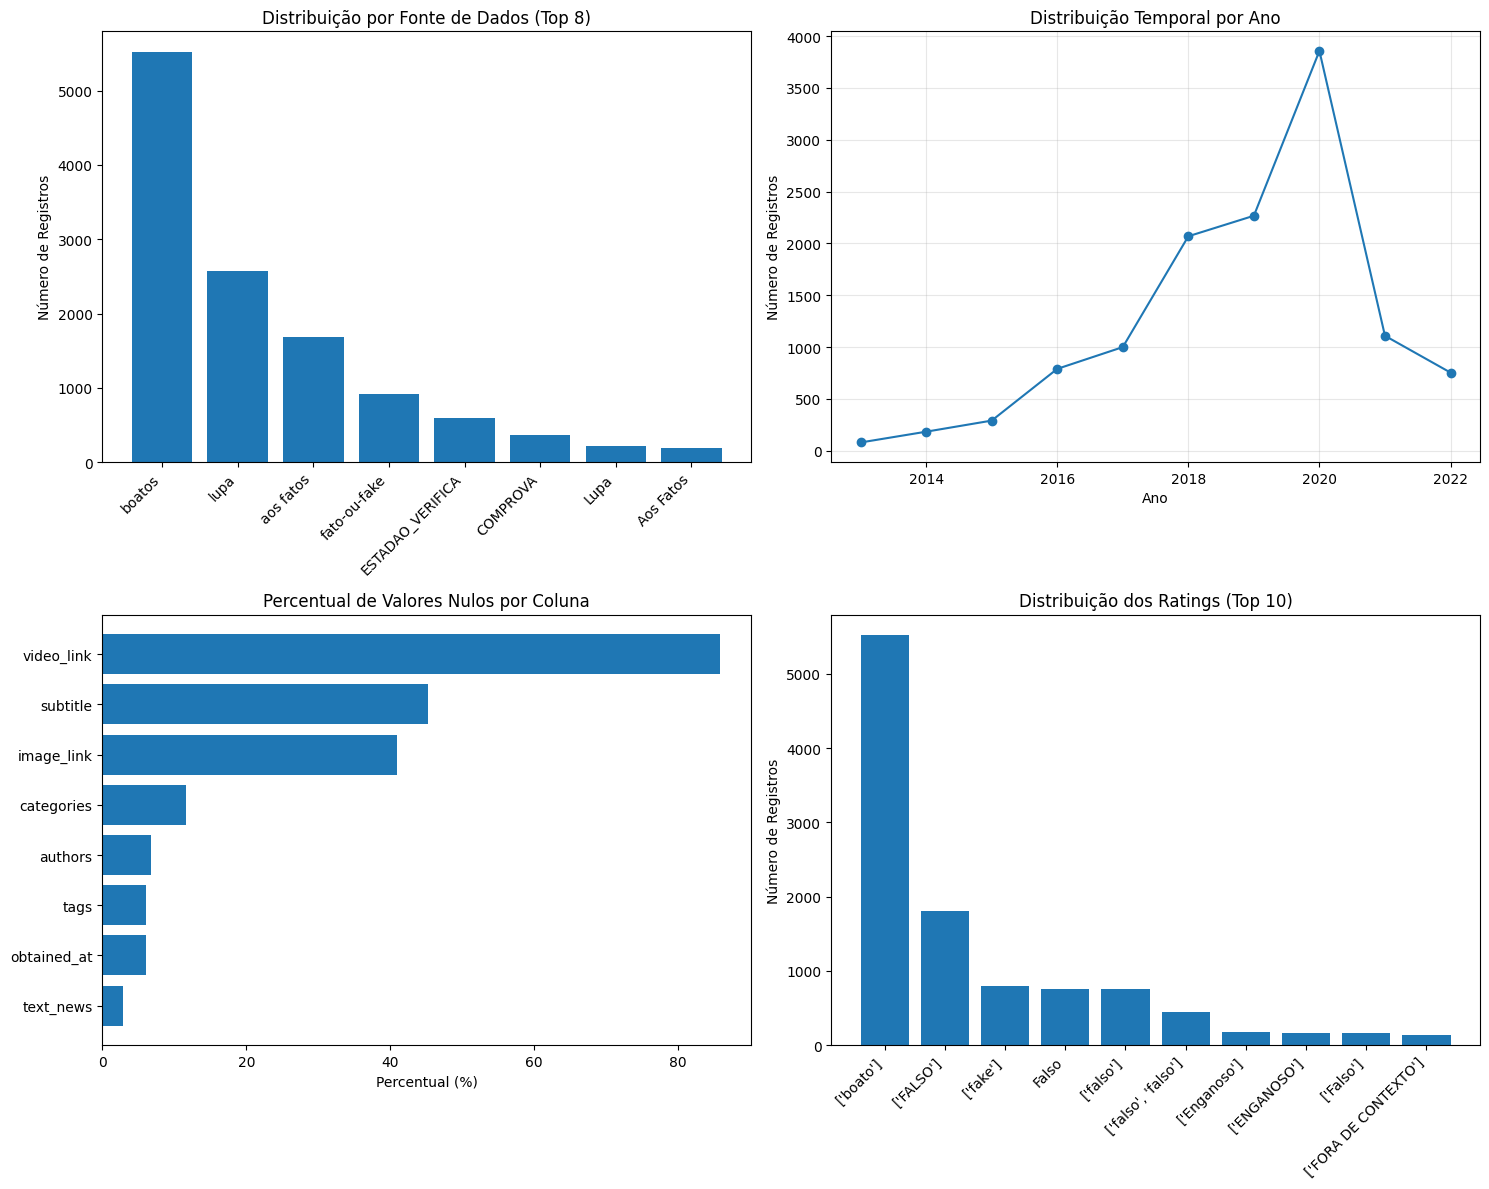

In [2]:
# 9. Visualizações
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribuição por fonte (top 8)
top_sources = df_merged['source_name'].value_counts().head(8)
axes[0,0].bar(range(len(top_sources)), top_sources.values)
axes[0,0].set_title('Distribuição por Fonte de Dados (Top 8)')
axes[0,0].set_xticks(range(len(top_sources)))
axes[0,0].set_xticklabels(top_sources.index, rotation=45, ha='right')
axes[0,0].set_ylabel('Número de Registros')

# 2. Distribuição temporal por ano
df_merged['publication_date_clean'] = pd.to_datetime(df_merged['publication_date'], errors='coerce')
df_merged['year'] = df_merged['publication_date_clean'].dt.year
year_counts = df_merged['year'].value_counts().sort_index()
axes[0,1].plot(year_counts.index, year_counts.values, marker='o')
axes[0,1].set_title('Distribuição Temporal por Ano')
axes[0,1].set_xlabel('Ano')
axes[0,1].set_ylabel('Número de Registros')
axes[0,1].grid(True, alpha=0.3)

# 3. Valores nulos por coluna
null_counts = df_merged.isnull().sum()
null_percentages = (null_counts / len(df_merged)) * 100
significant_nulls = null_percentages[null_percentages > 0].sort_values(ascending=True)
axes[1,0].barh(range(len(significant_nulls)), significant_nulls.values)
axes[1,0].set_title('Percentual de Valores Nulos por Coluna')
axes[1,0].set_yticks(range(len(significant_nulls)))
axes[1,0].set_yticklabels(significant_nulls.index)
axes[1,0].set_xlabel('Percentual (%)')

# 4. Distribuição de ratings (top 10)
top_ratings = df_merged['rating'].value_counts().head(10)
axes[1,1].bar(range(len(top_ratings)), top_ratings.values)
axes[1,1].set_title('Distribuição dos Ratings (Top 10)')
axes[1,1].set_xticks(range(len(top_ratings)))
axes[1,1].set_xticklabels(top_ratings.index, rotation=45, ha='right')
axes[1,1].set_ylabel('Número de Registros')

plt.tight_layout()
plt.show()

In [3]:
# 10. Salvar dataset final para análises futuras
output_file = '../data/dataset_final_merged.csv'
df_merged.to_csv(output_file, sep=';', encoding='utf-8', index=False)
print(f"Dataset final salvo em: {output_file}")
print(f"Total de registros salvos: {len(df_merged)}")
print(f"Total de colunas: {len(df_merged.columns)}")

# Estatísticas finais
print("\n" + "=" * 50)
print("ESTATÍSTICAS FINAIS DO DATASET MERGEADO")
print("=" * 50)
print(f"📊 Período: {df_merged['publication_date_clean'].min().strftime('%Y-%m-%d')} a {df_merged['publication_date_clean'].max().strftime('%Y-%m-%d')}")
print(f"📝 Registros totais: {len(df_merged):,}")
print(f"🔗 URLs únicos: {df_merged['url'].nunique():,}")
print(f"📰 Fontes diferentes: {df_merged['source_name'].nunique()}")
print(f"🏷️ Ratings diferentes: {df_merged['rating'].nunique()}")
print(f"📱 Com imagens: {df_merged['image_link'].notna().sum():,} ({(df_merged['image_link'].notna().sum()/len(df_merged)*100):.1f}%)")
print(f"🎥 Com vídeos: {df_merged['video_link'].notna().sum():,} ({(df_merged['video_link'].notna().sum()/len(df_merged)*100):.1f}%)")

Dataset final salvo em: ../data/dataset_final_merged.csv
Total de registros salvos: 12401
Total de colunas: 15

ESTATÍSTICAS FINAIS DO DATASET MERGEADO
📊 Período: 2013-07-01 a 2022-09-16
📝 Registros totais: 12,401
🔗 URLs únicos: 12,393
📰 Fontes diferentes: 13
🏷️ Ratings diferentes: 1024
📱 Com imagens: 7,317 (59.0%)
🎥 Com vídeos: 1,752 (14.1%)
